In [1]:
import tensorflow as tf

print(tf.__version__)

2.8.0


In [18]:
#callback para o treinamento quando chega em uma certa accuracy/loss
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    '''
    Halts the training after reaching 60 percent accuracy

    Args:
      epoch (integer) - index of epoch (required but unused in the function definition below)
      logs (dict) - metric results from the training epoch
    '''

    # Check accuracy
    if(logs.get('loss') < 0.4):

      # Stop if threshold is met
      print("\nLoss is lower than 0.4 so cancelling training!")
      self.model.stop_training = True

# Instantiate class
callbacks = myCallback()

In [9]:
#vamos agora carregar um dataset de roupas 28x28 pixels
fmnist = tf.keras.datasets.fashion_mnist

#load_data vai fornecer duas tuplas com duas listas cada, a training e a testing
#usa uma parte do data set para treinar -> training
#usa uma parte não utilziada ainda para testar o algoritmo -> test


(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()


#vamos normalizar para trabalhar com valores menores
training_images  = training_images / 255.0
test_images = test_images / 255.0


LABEL: 9

IMAGE PIXEL ARRAY:
 [[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.

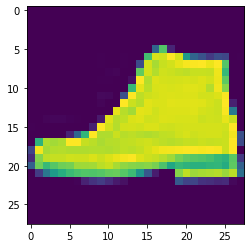

In [10]:
#vamos usar matplotlib pra ver cada matriz de pixels

import numpy as np
import matplotlib.pyplot as plt

# You can put between 0 to 59999 here
index = 42

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Print the label and image
print(f'LABEL: {training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {training_images[index]}')

# Visualize the image
plt.imshow(training_images[index])

In [16]:
#Criando o model
#sequential define a sequencia de layers
#dense adiciona uma layer de neurons
#3 layers -> a primeira é o input,
#a do meio é uma intermediária com 128 neurons, seriam como variáveis
#e a ultima é a que classifica, com 10 neurons (10 classes de roupa possiveis)
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape = (28,28)), 
                                    tf.keras.layers.Dense(2048, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

#vai mostrar a accuracy no training set

In [19]:
#compilando e treinando o model
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5,callbacks=[callbacks])

Epoch 1/5
1874/1875 [============================>.] - ETA: 0s - loss: 0.2169 - accuracy: 0.9188
Loss is lower than 0.4 so cancelling training!
1875/1875 [==============================] - 39s 21ms/step - loss: 0.2168 - accuracy: 0.9188


In [13]:
#vamos testar agora o model no test set
#retorna loss,accuracy
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3384 - accuracy: 0.8831


[0.3383868336677551, 0.8830999732017517]

In [14]:
#vamos agorar tentar predizer a uma bota
classifications = model.predict(test_images)

print(classifications[0])
#no print mostra que o décimo valor é o maior, isso é um array de probabilidades
#o que quer dizer que se o décimo é o maior, é uma bota

[2.2408959e-09 1.0254374e-11 5.8527216e-10 6.6581751e-10 5.2933382e-09 3.3944019e-05 2.2598730e-08 4.9439082e-03 5.0092833e-08 9.9502218e-01]


9
